ASSIGNMENT 4

# Question 1 

In [156]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder, StandardScaler
import seaborn as sns
sns.set(style="white", color_codes=True)
import warnings
warnings.filterwarnings("ignore")

a. Import the given “Salary_Data.csv”


In [157]:
df=pd.read_csv("Salary_Data.csv")
df.head()

,Years Experience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


b. Split the data in train_test partitions, such that 1/3 of the data is reserved as test subset

In [158]:
A = df.iloc[:, :-1].values
B = df.iloc[:, 1].values
A_Train, A_Test, B_Train, B_Test = train_test_split(A,B, test_size=1/3,random_state = 0)

c. Train and predict the model. 

In [159]:
regressor = LinearRegression()
regressor.fit(A_Train, B_Train)
B_Pred = regressor.predict(A_Test)

d. Calculate the mean_squared error

In [160]:
mean_squared_error(B_Test,B_Pred)

21026037.329511296

e. Visualize both train and test data using scatter plot

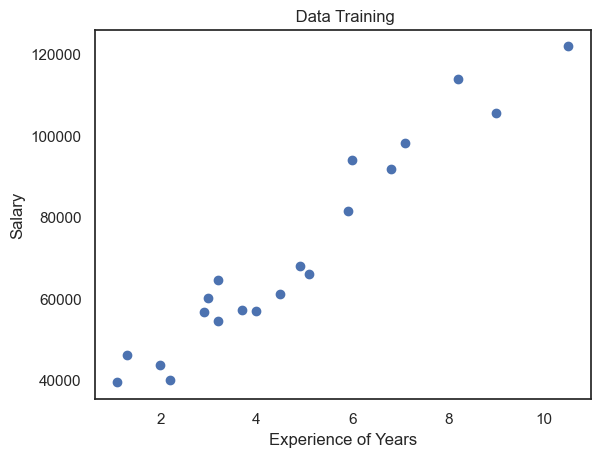

In [161]:
plt.title(' Data Training')
plt.xlabel('Experience of Years')
plt.ylabel('Salary')
plt.scatter(A_Train, B_Train)
plt.show()

# Question 2

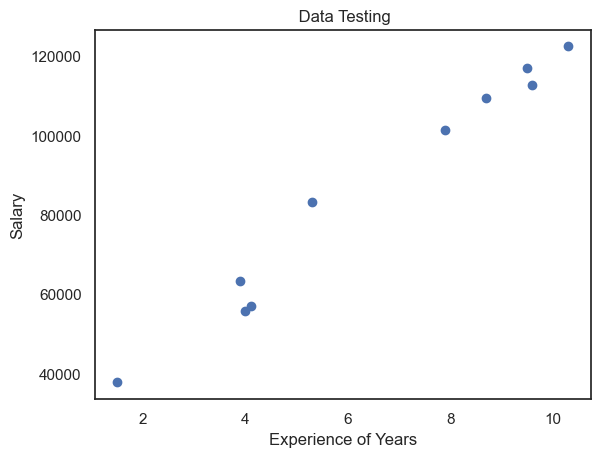

In [162]:
plt.title(' Data Testing')
plt.xlabel('Experience of Years')
plt.ylabel('Salary')
plt.scatter(A_Test, B_Test)
plt.show()

Apply K means clustering in the dataset provided:


In [163]:
df2=pd.read_csv("K-Mean_Dataset.csv")
df2.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


Remove any null values by the mean

In [164]:
A = df2.iloc[:,1:].values
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer = imputer.fit(A)
A = imputer.transform(A)

Use the elbow method to find a good number of clusters with the K-Means algorithm

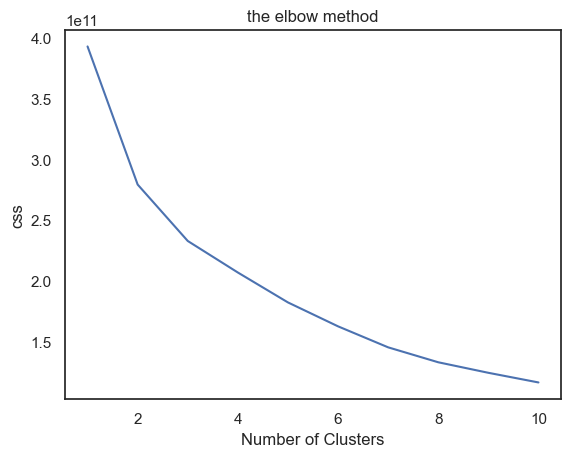

In [154]:
css = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(A)
    css.append(kmeans.inertia_)

plt.plot(range(1,11),css)
plt.title('the elbow method')
plt.xlabel('Number of Clusters')
plt.ylabel('css')
plt.show()

In [165]:
from sklearn.cluster import KMeans
nclusters = 3 # this is the k in kmeans
km = KMeans(n_clusters=nclusters)
km.fit(A)

KMeans(n_clusters=3)

Calculate the silhouette score for the above clustering

In [167]:
y_cluster_kmeans = km.predict(A)
from sklearn import metrics
score = metrics.silhouette_score(A, y_cluster_kmeans)
print('Silhouette score:',score)

Silhouette score: 0.46675588595465034


# Question 3

3. Try feature scaling and then apply K-Means on the scaled features. Did that improve the Silhouette score? If
Yes, can you justify why


In [146]:
scaler = preprocessing.StandardScaler()
scaler.fit(A)
A_scaled_array = scaler.transform(A)
A_scaled = pd.DataFrame(A_scaled_array, columns =df2.columns[1:])

In [147]:
from sklearn.cluster import KMeans
nclusters = 3
km = KMeans(n_clusters=nclusters)
km.fit(A_scaled)

KMeans(n_clusters=3)

In [148]:
y_scaled_cluster_kmeans = km.predict(A_scaled)
from sklearn import metrics
score = metrics.silhouette_score(A_scaled, y_scaled_cluster_kmeans)
print('Silhouette score after applying scaling:',score)

Silhouette score after applying scaling: 0.25055570796307736


Accuracy not bettered.So, scaling the feature is required because ,if two features scales are different in nature then scaling is required to put in same range.